In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math



df = pd.read_csv('Rotman MMA Summer Datathon.csv')
#filtering for data for women only
women_data = df[df['team_name'].str.contains("Women") & df['team_name'].str.contains("Canada")]
# print (women_data.columns)
#women_data.columns

#{name:[power score , penalty score]}
player_score = dict()


def div_safe(x,y):
    try:
        return x/y
    except ZeroDivisionError:
        return 0
    
def cal_Distance(x1,y1,x2,y2):
    return round(math.sqrt((x2-x1)**2+(y2-y1)**2),2)


In [10]:
#------- Power Sepecialist----------


# {name : [count of t, total count, receive count of t ,  total recieve, [distance list] , [location list[x,y]]}
power_PlayCounts = dict()
# {name : [play success rate, receive success rate ,  average distance, count of edge pass}
power_PlayStats = dict()
# {name : [count of successful shot, total shot count, long distance shot count , short distance shot count]}
power_ShotCounts = dict()
# {name : [shot success rate]}
power_ShotStats = dict()
#{name : [play success rate, receive success rate ,  average distance}
power_Score = dict()


#Extract data from the sources and orgnaize it in dictionary
for i , j in women_data.iterrows():
    # field of interest
    name = women_data.loc[i]['player_name']
    receiver = women_data.loc[i]['receiver_name']
    
    situation = women_data.loc[i]['situation_type']
    event = women_data.loc[i]['event_type']
    success = women_data.loc[i]['event_successful']
    shot = women_data.loc[i]['shot_type']
    
    eventX = women_data.loc[i]['x_event']
    eventY = women_data.loc[i]['y_event']
    receiveX = women_data.loc[i]['receiver_x']
    receiveY = women_data.loc[i]['receiver_y']
    if situation == '5 on 4' or situation == '5 on 3' or situation == '4 on 3' or situation == '6 on 5' or situation == '6 on 4':
        if event == 'Play':        
            if name not in power_PlayCounts:
                power_PlayCounts[name] = [0,0,0,0,[],[]]
            if receiver not in power_PlayCounts: 
                power_PlayCounts[receiver] = [0,0,0,0,[],[]]

            power_PlayCounts[name][1] = power_PlayCounts[name][1] + 1
            power_PlayCounts[receiver][3] = power_PlayCounts[receiver][3] + 1
            power_PlayCounts[name][5].append([eventX,eventY,receiveX,receiveY,success])
            if success == 't':
                power_PlayCounts[name][0] = power_PlayCounts[name][0] + 1
                power_PlayCounts[receiver][2] = power_PlayCounts[receiver][2] + 1
                power_PlayCounts[name][4].append(cal_Distance(eventX,eventY,receiveX,receiveY))
                
        
        elif event == 'Shot':               
            if name not in power_ShotCounts:
                power_ShotCounts[name] = [0,0,0,0,[]]
                
            power_ShotCounts[name][1] = power_ShotCounts[name][1]+1         
            power_ShotCounts[name][4].append([eventX,eventY,success])
            if success == 't':

                power_ShotCounts[name][0] = power_ShotCounts[name][0]+1
                
                if shot == 'Snapshot' or shot == 'Slapshot' or shot == 'Wristshot':
                    power_ShotCounts[name][2] = power_ShotCounts[name][2]+1
                
                elif shot == 'Wrap Around' or shot == 'Deflection':
                    power_ShotCounts[name][3] = power_ShotCounts[name][3]+1
           
# calculate Status
for name,value in power_PlayCounts.items():
    #play success rate
    power_PlayStats[name] = []
    power_PlayStats[name].append(div_safe(value[0],value[1]))
    #recieve success rate
    power_PlayStats[name].append(div_safe(value[2],value[3]))
    #avg distance of success pass
    power_PlayStats[name].append(div_safe(sum(value[4]),len(value[4])))

    
for name,value in power_ShotCounts.items():
    #shot success rate
    power_ShotStats[name] = []
    power_ShotStats[name].append(value[0])
    power_ShotStats[name].append(div_safe(value[0],value[1]))    
    power_ShotStats[name].append(value[2])
    power_ShotStats[name].append(value[3])
    


# print ("All Power: ", power_PlayCounts)
# print ("------------------------")
# print ("Stats: ", power_PlayStats)
# print ("============")
# print ("All Power Play shot: ", power_ShotCounts)
# print ("------------------------------------------------------------")
# print ("Shot Success Rate: ", power_ShotStats)
    




for i in range (3):
    j = 0
    temp_value = 0
    temp_score = 100
    for name, value in sorted(power_PlayStats.items(), key=lambda e: e[1][i],reverse = True):
        if name not in power_Score:
            power_Score[name] = [0,0,0,0,0,0,0]
        if temp_value != value[i]:
            power_Score[name][i] = max (100 - j*5, 0)
            temp_score = power_Score[name][i]
            j += 1
        else:
            power_Score[name][i] = temp_score
        temp_value = value[i]    
#         print ("Play: ",i, name, value, power_Score[name][i])
#     print ("------------")

for i in range (4):
    j = 0
    temp_value = 0
    temp_score = 100
    for name, value in sorted(power_ShotStats.items(), key=lambda e: e[1][i],reverse = True):
        if name not in power_Score:
            power_Score[name] = [0,0,0,0,0,0,0]
        if temp_value != value[i]:
            power_Score[name][i+3] = max (100 - j*5, 0)
            temp_score = power_Score[name][i+3]
            j += 1
        else:
            power_Score[name][i+3] = temp_score
            
        if value[i] == 0:
            power_Score[name][i+3] = 0
        temp_value = value[i]  
#         print ("Shot: ",i, name, value, power_Score[name][i+3])
#     print ("------------")





#{ 20%, 10%, 10%, 25%, 10%, 15%, 10%,}     
# {name : [play success rate, receive success rate ,average distance,shot rate, shot success, long, short]}
# print ("===========================")
# print ("power_Socre: ",power_Score)


#assigne total score
for name,value in power_Score.items(): 
    if name not in player_score:
        player_score[name] = [0,0]
    player_score[name][0] = value[0]*0.20+value[1]*0.10+value[2]*0.10+value[3]*0.25+value[4]*0.10+value[5]*0.15+value[6]*0.10
    
    
# print ("==================")
# print (sorted(player_score.items(), key=lambda e: e[1][0],reverse = True))


In [15]:
#------- Penalty Sepecialist----------


# {name : [count of t, total count, receive count of t ,  total recieve, [distance list] , [location list[x,y,x,y,t]]}
penalty_PlayCounts = dict()
# {name : [total count, [game,time] , [location list[x,y]]}
penalty_TakeawayCounts = dict()
# {name : [play success rate, receive success rate ,  average distance, count of edge pass}
penalty_PlayStats = dict()
# {name : [# total count, # at def side]}
penalty_TakeawayStats = dict()
# {name : [play success rate, receive success rate ,average distance,# total count, # at def side]}
penalty_Score = dict()


#Extract data from the sources and orgnaize it in dictionary
for i , j in women_data.iterrows():
    # field of interest
    name = women_data.loc[i]['player_name']
    receiver = women_data.loc[i]['receiver_name']
    
    situation = women_data.loc[i]['situation_type']
    game = women_data.loc[i]['game_name']
    time = women_data.loc[i]['event_time']
    
    event = women_data.loc[i]['event_type']
    success = women_data.loc[i]['event_successful']
    
    eventX = women_data.loc[i]['x_event']
    eventY = women_data.loc[i]['y_event']
    receiveX = women_data.loc[i]['receiver_x']
    receiveY = women_data.loc[i]['receiver_y']
    
    
    if situation == '4 on 5' or situation == '3 on 5' or situation == '3 on 4':
        if event == 'Play':               
            if name not in penalty_PlayCounts:
                penalty_PlayCounts[name] = [0,0,0,0,[],[]]
            if receiver not in penalty_PlayCounts: 
                penalty_PlayCounts[receiver] = [0,0,0,0,[],[]]

            penalty_PlayCounts[name][1] = penalty_PlayCounts[name][1] + 1
            penalty_PlayCounts[receiver][3] = penalty_PlayCounts[receiver][3] + 1
            penalty_PlayCounts[name][5].append([eventX,eventY,receiveX,receiveY,success])
            if success == 't':
                penalty_PlayCounts[name][0] = penalty_PlayCounts[name][0] + 1
                penalty_PlayCounts[receiver][2] = penalty_PlayCounts[receiver][2] + 1
                penalty_PlayCounts[name][4].append(cal_Distance(eventX,eventY,receiveX,receiveY))
                
                
        elif event == 'Takeaway':
            if name not in penalty_TakeawayCounts:
                penalty_TakeawayCounts[name] = [0,[],[]]
            penalty_TakeawayCounts[name][0] = penalty_TakeawayCounts[name][0] + 1
            penalty_TakeawayCounts[name][1].append([game,time])
            penalty_TakeawayCounts[name][2].append([eventX,eventY])

            
            
# calculate Status
for name,value in penalty_PlayCounts.items():
    #--------------------play ----------------------
    penalty_PlayStats[name] = []
    #play success rate
    penalty_PlayStats[name].append(div_safe(value[0],value[1]))
    #recieve success rate
    penalty_PlayStats[name].append(div_safe(value[2],value[3]))
    #avg distance of success pass
    penalty_PlayStats[name].append(div_safe(sum(value[4]),len(value[4])))
    
for name,value in penalty_TakeawayCounts.items():    
    #--------------------takeaway ----------------------
    penalty_TakeawayStats[name] = []
    #total count 
    penalty_TakeawayStats[name].append(value[0])
    penalty_TakeawayStats[name].append(0)
    for i in penalty_TakeawayCounts[name][2][0]:
        if i < 100:
            penalty_TakeawayStats[name][1] += 1
    
    
print ("All Play: ", penalty_PlayCounts)
print ("------------------------")
print ("Stats: ", penalty_PlayStats)
print ("===================================")
print ("All Takeaway: ", penalty_TakeawayCounts)
print ("------------------------")
print ("Stats: ", penalty_TakeawayStats)



#assign scores for play
for i in range (3):
    j = 0
    temp_value = 0
    temp_score = 100
    for name, value in sorted(penalty_PlayStats.items(), key=lambda e: e[1][i],reverse = True):
        if name not in penalty_Score:
            penalty_Score[name] = [0,0,0,0,0]
            
        if temp_value != value[i]:
            penalty_Score[name][i] = max (100 - j*5, 0)
            temp_score = penalty_Score[name][i]
            j += 1
        else:
            penalty_Score[name][i] = temp_score
        temp_value = value[i]        
#         print (i, name, value, penalty_Score[name][i])
#     print ("------------")

#assign scores for takeaway
for i in range (2):
    j = 0
    temp_value = 0
    temp_score = 100
    for name, value in sorted(penalty_TakeawayStats.items(), key=lambda e: e[1][i],reverse = True):
        if name not in penalty_Score:
            penalty_Score[name] = [0,0,0,0,0]
            
        if temp_value != value[i]:
            penalty_Score[name][i+3] = max (100 - j*5, 0)
            temp_score = penalty_Score[name][i+3]
            j += 1
        else:
            penalty_Score[name][i+3] = temp_score
        temp_value = value[i]  
#         print (i, name, value, penalty_Score[name][i+3])
#     print ("------------")
    
    
# print ("==================")
#{20%, 10%, 10%, 40%, 20%}     
# {name : [play success rate, receive success rate ,average distance,# total count takeaway, # at def side for takeaway]}
# print ("penalty_Score: ",penalty_Score)


#assigne total score
for name,value in penalty_Score.items(): 
    if name not in player_score:
        player_score[name] = [0,0]
    player_score[name][1]=value[0]*0.20+value[1]*0.10+value[2]*0.10+value[3]*0.40+value[4]*0.20
    
    
# print ("==================")
# print (sorted(player_score.items(), key=lambda e: e[1][1],reverse = True))

print ("Power: ",sorted(player_score.items(), key=lambda e: e[1][0],reverse = True))
print ("==================")
print ("Penalty: ",sorted(player_score.items(), key=lambda e: e[1][1],reverse = True))

All Play:  {'Meaghan Mikkelson': [3, 4, 1, 2, [19.1, 80.62, 16.03], [[6, 45, 8.0, 64.0, 't'], [8, 12, 48.0, 82.0, 't'], [11, 13, 47.0, 82.0, 'f'], [33, 38, 49.0, 39.0, 't']]], 'Emily Clark': [2, 5, 4, 6, [51.01, 51.74], [[24, 78, 75.0, 77.0, 't'], [77, 26, 77.0, 12.0, 'f'], [6, 12, 5.0, 21.0, 'f'], [33, 48, 72.0, 82.0, 't'], [24, 3, 45.0, 3.0, 'f']]], 'Sarah Nurse': [1, 3, 4, 8, [10.2], [[1, 57, 6.0, 22.0, 'f'], [6, 73, 2.0, 42.0, 'f'], [73, 84, 83.0, 82.0, 't']]], 'Renata Fast': [7, 13, 6, 9, [22.2, 25.18, 29.83, 26.57, 11.18, 16.28, 18.79], [[5, 69, 23.0, 80.0, 'f'], [5, 59, 2.0, 37.0, 't'], [29, 60, 26.0, 35.0, 't'], [4, 63, 27.0, 82.0, 't'], [7, 11, 20.0, 80.0, 'f'], [27, 53, 2.0, 62.0, 't'], [20, 82, 47.0, 78.0, 'f'], [19, 64, 29.0, 59.0, 't'], [2, 39, 5.0, 55.0, 't'], [11, 75, 36.0, 84.0, 'f'], [22, 2, 39.0, 16.0, 'f'], [60, 83, 68.0, 75.0, 'f'], [34, 13, 26.0, 30.0, 't']]], 'Bailey Bram': [1, 2, 2, 4, [17.12], [[23, 82, 40.0, 80.0, 't'], [29, 59, 14.0, 70.0, 'f']]], 'Jocelyne La

In [12]:
power_selected = []
penalty_selected = []



for i in range (5):
    power_selected.append(sorted(player_score.items(), key=lambda e: e[1][0],reverse = True)[i][0])
    if i <4:
        penalty_selected.append(sorted(player_score.items(), key=lambda e: e[1][1],reverse = True)[i][0])
    
print ("power: ",power_selected)
print ("penalty: ",penalty_selected)

power:  ['Brianne Jenner', 'Laura Fortino', 'Meghan Agosta', 'Rebecca Johnston', 'Sarah Nurse']
penalty:  ['Jocelyne Larocque', 'Erin Ambrose', 'Halli Krzyzaniak', 'Laura Stacey']


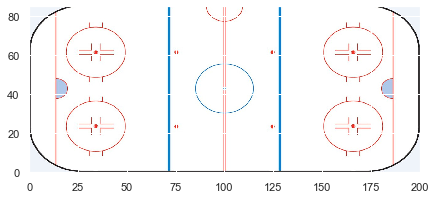

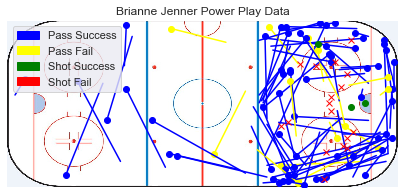

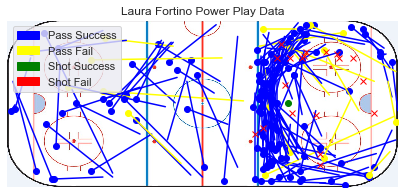

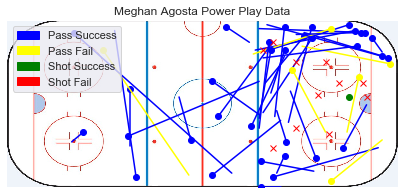

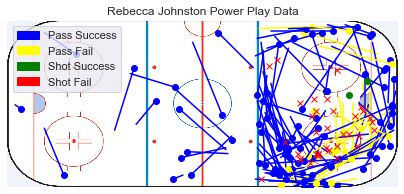

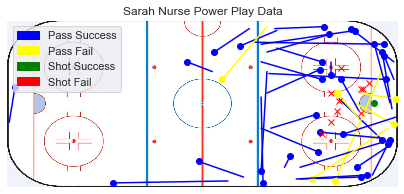

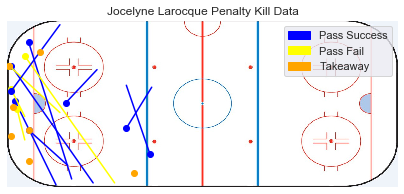

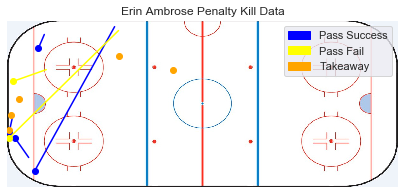

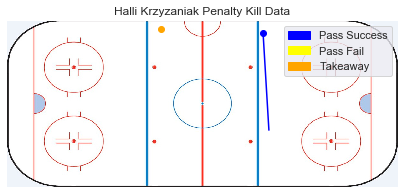

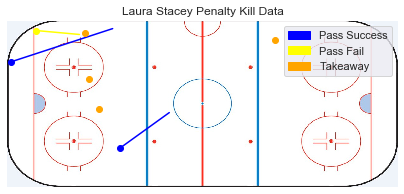

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.patches as mpatches

fp = "HockeyDiagram1.jpg"
img = plt.imread(fp)
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ext = [0.0, 200.00, 0.00, 85.00]
plt.imshow(img, zorder=0, extent=ext)
passt = mpatches.Patch(color="blue", label='Pass Success')
passf = mpatches.Patch(color="yellow", label='Pass Fail')
shott = mpatches.Patch(color="green", label='Shot Success')
shotf = mpatches.Patch(color="red", label='Shot Fail')
takeawayt = mpatches.Patch(color="orange", label='Takeaway')

#play_cord[name].append([eventX,eventY,receiveX,receiveY,success])
for name in power_selected:
    fp = "HockeyDiagram1.jpg"
    img = plt.imread(fp)
    fig, ax = plt.subplots()
    fig.set_size_inches(7, 5)
    ext = [0.0, 200.00, 0.00, 85.00]
    plt.imshow(img, zorder=0, extent=ext)
    for i in range(len(power_PlayCounts[name][5])):
        if power_PlayCounts[name][5][i][4] == 't':
            plt.plot([power_PlayCounts[name][5][i][0],power_PlayCounts[name][5][i][2]],
                     [power_PlayCounts[name][5][i][1],power_PlayCounts[name][5][i][3]], 
                     color="blue")
            plt.plot(power_PlayCounts[name][5][i][0],power_PlayCounts[name][5][i][1],"o", color="blue")
        else: 
            plt.plot([power_PlayCounts[name][5][i][0],power_PlayCounts[name][5][i][2]],
                     [power_PlayCounts[name][5][i][1],power_PlayCounts[name][5][i][3]], 
                     color="yellow")
            plt.plot(power_PlayCounts[name][5][i][0],power_PlayCounts[name][5][i][1],"o", color="yellow")
        #plt.plot(power_PlayCounts[name][5][i][0],power_PlayCounts[name][5][i][1],"o", color="blue")

    for i in range(len(power_ShotCounts[name][4])):
        if power_ShotCounts[name][4][i][2] == 't':
            plt.plot(power_ShotCounts[name][4][i][0],power_ShotCounts[name][4][i][1],"o", color="green")
        else: 
            plt.plot(power_ShotCounts[name][4][i][0],power_ShotCounts[name][4][i][1],"x", color="red")
        
#     x_coord = [i[0] for i in play_cord[name]]
#     y_coord = [i[1] for i in play_cord[name]]

    #sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    title = name + " Power Play Data"
    filename = title + ".png"
    plt.title(title)
    plt.axis('off')
    plt.legend(loc='upper left',handles=[passt,passf,shott,shotf])

    #plt.show()
    plt.savefig(filename, dpi=300, format='png', bbox_inches='tight') 

print ("=====================")

for name in penalty_selected:
    fp = "HockeyDiagram1.jpg"
    img = plt.imread(fp)
    fig, ax = plt.subplots()
    fig.set_size_inches(7, 5)
    ext = [0.0, 200.00, 0.00, 85.00]
    plt.imshow(img, zorder=0, extent=ext)
    for i in range(len(penalty_PlayCounts[name][5])):
        if penalty_PlayCounts[name][5][i][4] == 't':
            plt.plot([penalty_PlayCounts[name][5][i][0],penalty_PlayCounts[name][5][i][2]],
                     [penalty_PlayCounts[name][5][i][1],penalty_PlayCounts[name][5][i][3]], 
                     color="blue")
            plt.plot(penalty_PlayCounts[name][5][i][0],penalty_PlayCounts[name][5][i][1],"o", color="blue")
        else: 
            plt.plot([penalty_PlayCounts[name][5][i][0],penalty_PlayCounts[name][5][i][2]],
                     [penalty_PlayCounts[name][5][i][1],penalty_PlayCounts[name][5][i][3]], 
                     color="yellow")
            plt.plot(penalty_PlayCounts[name][5][i][0],penalty_PlayCounts[name][5][i][1],"o", color="yellow")

        #plt.plot(penalty_PlayCounts[name][5][i][0],penalty_PlayCounts[name][5][i][1],"o", color="blue")

    for i in range(len(penalty_TakeawayCounts[name][2])):
        plt.plot(penalty_TakeawayCounts[name][2][i][0],penalty_TakeawayCounts[name][2][i][1],"o", color="orange")

      
#     x_coord = [i[0] for i in play_cord[name]]
#     y_coord = [i[1] for i in play_cord[name]]

    #sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    title = name + " Penalty Kill Data"
    filename = title + ".png"
    plt.title(title)
    plt.axis('off')
    plt.legend(loc='upper right',handles=[passt,passf,takeawayt])
    #plt.show()
    plt.savefig(filename, dpi=300, format='png', bbox_inches='tight') 



C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


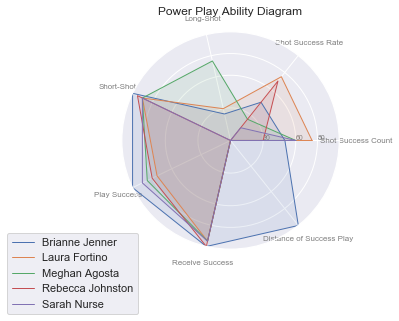

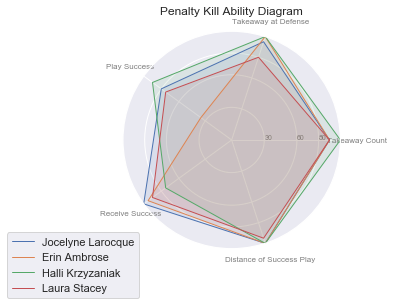

In [14]:
# number of variable
from math import pi

power_Cat=["Shot Success Count", "Shot Success Rate", "Long-Shot", "Short-Shot", "Play Success", "Receive Success", "Distance of Success Play"]
Npower = len(power_Cat)
penalty_Cat=["Takeaway Count", "Takeaway at Defense", "Play Success", "Receive Success", "Distance of Success Play"]
Npenalty = len(penalty_Cat)
# print(power_Cat)
# print (N)
 
    
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:

# name = power_selected[0]


for name in power_selected:
#     plt.figure()
    values = []
    angles = []
    
    values = power_Score.get(name)
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(Npower) * 2 * pi for n in range(Npower)]
    angles += angles[:1]
#     print (angles)
#     print (power_Score[name])
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], power_Cat, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([30,60,80], ["30","60","80"], color="grey", size=7)
    plt.ylim(0,100)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid',label = name)

    # Fill area
    ax.fill(angles, values, alpha=0.1)
    
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    
title = "Power Play Ability Diagram.png"
plt.title("Power Play Ability Diagram")
plt.savefig(title, dpi=300, format='png', bbox_inches='tight') 

plt.figure()
for name in penalty_selected:
#     plt.figure()
    values = []
    angles = []
    
    values = penalty_Score.get(name)
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(Npenalty) * 2 * pi for n in range(Npenalty)]
    angles += angles[:1]
#     print (angles)
#     print (power_Score[name])
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], penalty_Cat, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([30,60,80], ["30","60","80"], color="grey", size=7)
    plt.ylim(0,100)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid',label = name)

    # Fill area
    ax.fill(angles, values, alpha=0.1)
    
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
title = "Penalty Kill Ability Diagram.png"
plt.title("Penalty Kill Ability Diagram")
plt.savefig(title, dpi=300, format='png', bbox_inches='tight') 